In [ ]:
# CRISP-DM: Data Understanding & Preparation – Data Quality Check

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset
file_path = 'Neat_Imputed_Nitrate_Dataset.csv'  # Replace with your file path if needed
df = pd.read_csv(file_path)


In [ ]:
#--- 1. Overview ---
print("📊 Data Shape:", df.shape)
print("\n📄 Column Names:\n", df.columns.tolist())
print("\n🔍 Data Types:\n", df.dtypes)

missing_values = df.isnull().sum()
missing_percent = (missing_values / len(df)) * 100
missing_report = pd.DataFrame({'Missing Count': missing_values, 'Missing %': missing_percent})
missing_report[missing_report['Missing Count'] > 0].sort_values(by='Missing %', ascending=False)

# --- 2. Duplicate Checks ---
print("\n✅ Duplicate Rows:", df.duplicated().sum())

# --- 3. Missing Values ---
missing = df.isnull().sum()
missing_percent = (missing / len(df)) * 100
print("\n🔧 Missing Values:\n", pd.DataFrame({'Missing Count': missing, 'Percent (%)': missing_percent}))

# --- 4. Unique Values ---
unique_counts = df.nunique()
print("\n🔎 Unique Values per Column:\n", unique_counts)

# --- 5. Constant Columns (only one unique value) ---
constant_columns = unique_counts[unique_counts == 1].index.tolist()
if constant_columns:
    print("\n⚠️ Constant Columns (Only 1 Unique Value):", constant_columns)
else:
    print("\n✅ No constant columns found.")

    # --- 6. Highly Correlated Features ---
# Only for numeric columns
numeric_df = df.select_dtypes(include='number')
correlation_matrix = numeric_df.corr()
# Find strong correlations
threshold = 0.9
high_corr_pairs = []
for col in correlation_matrix.columns:
    for idx in correlation_matrix.index:
        if col != idx:
            corr_value = correlation_matrix.loc[idx, col]
            if abs(corr_value) > threshold:
                pair = tuple(sorted((col, idx)))
                if pair not in high_corr_pairs:
                    high_corr_pairs.append((pair, corr_value))

print("\n🔗 Highly Correlated Pairs (|r| > 0.9):")
for pair, value in high_corr_pairs:
    print(f"{pair}: {value:.2f}")



📊 Data Shape: (27101, 23)

📄 Column Names:
 ['year', 'month', 'pH', 'electrical_conductivity_dS_m', 'ammonium_mg_L', 'nitrate_input_mg_L', 'fertilizer_kg_ha', 'manure_kg_ha', 'chloride_mg_L', 'crop_type', 'livestock_density_LU_ha', 'urbanization', 'soil_type', 'aquifer_type', 'permeability_m_day', 'groundwater_level_cm', 'precipitation_mm', 'evaporation_mm', 'drought_days', 'avg_sunlight_hours', 'avg_humidity_percent', 'avg_temp_C', 'nitrate_groundwater_mg_L']

🔍 Data Types:
 year                            float64
month                           float64
pH                              float64
electrical_conductivity_dS_m    float64
ammonium_mg_L                   float64
nitrate_input_mg_L              float64
fertilizer_kg_ha                float64
manure_kg_ha                    float64
chloride_mg_L                   float64
crop_type                        object
livestock_density_LU_ha         float64
urbanization                     object
soil_type                        object

In [20]:
df = pd.get_dummies(
    df,
    columns=["soil_type", "aquifer_type", "urbanization", "crop_type"],
    drop_first=True  # Avoids dummy variable trap
)

C:\Users\markh\AppData\Local\Temp\ipykernel_9992\2874064559.py:5: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
c:\Users\markh\.conda\envs\Minor\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


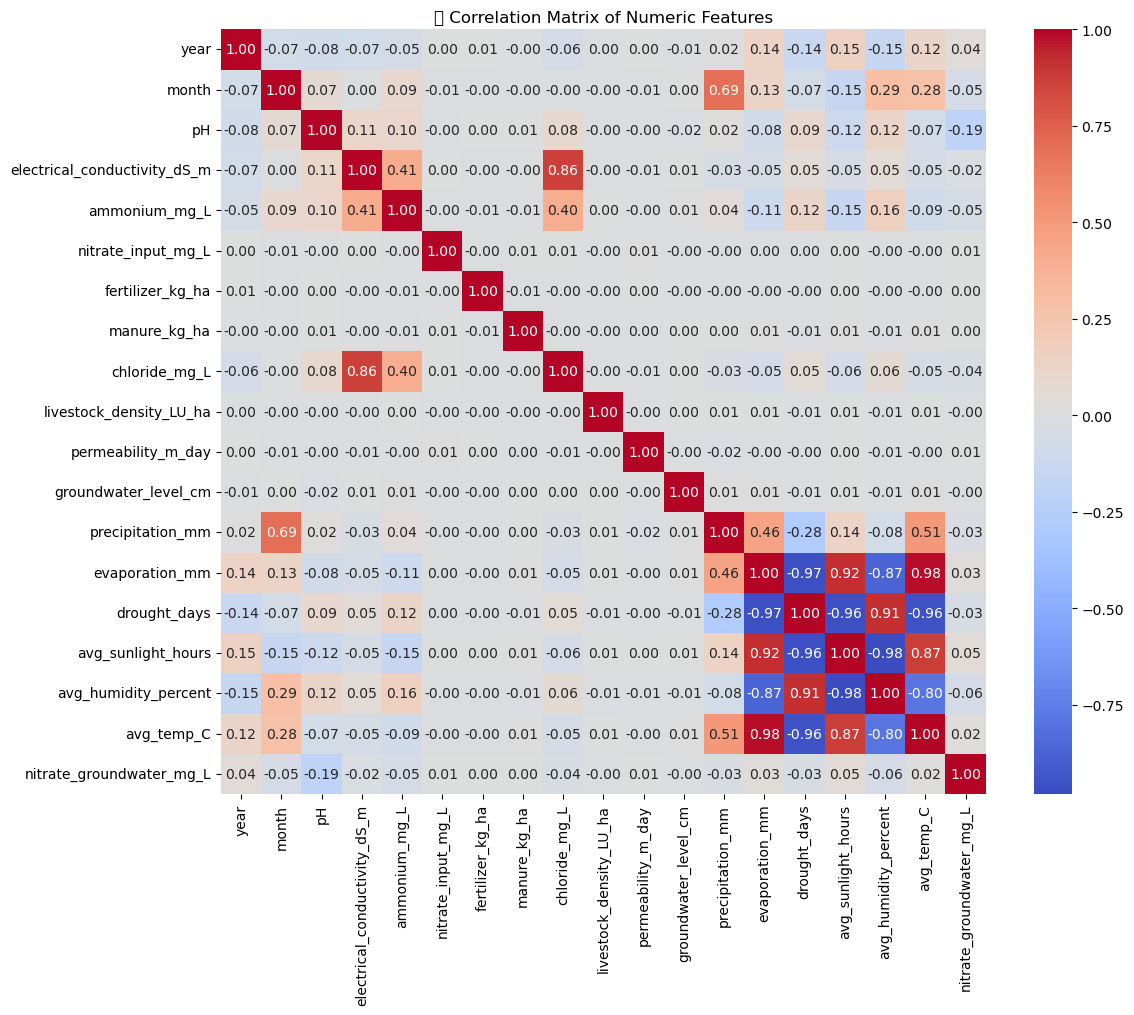

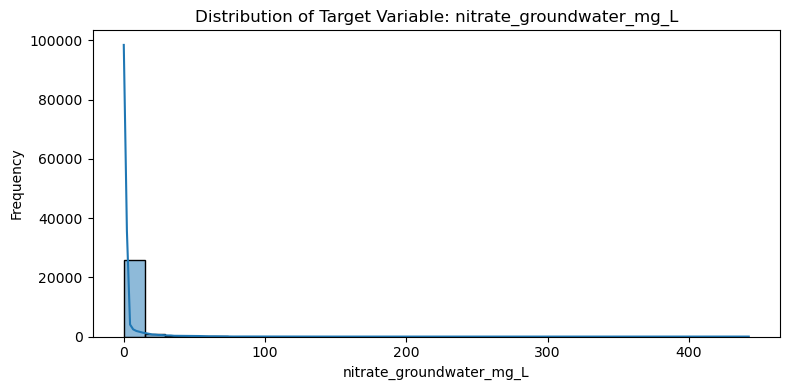

In [ ]:
# --- 7. Correlation Heatmap ---
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('🔍 Correlation Matrix of Numeric Features')
plt.tight_layout()
plt.show()

# --- 8. Distribution of Target Variable ---
target_col = 'nitrate_groundwater_mg_L'  # Replace if your target variable is different
plt.figure(figsize=(8, 4))
sns.histplot(df[target_col], bins=30, kde=True)
plt.title(f'Distribution of Target Variable: {target_col}')
plt.xlabel(target_col)
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()



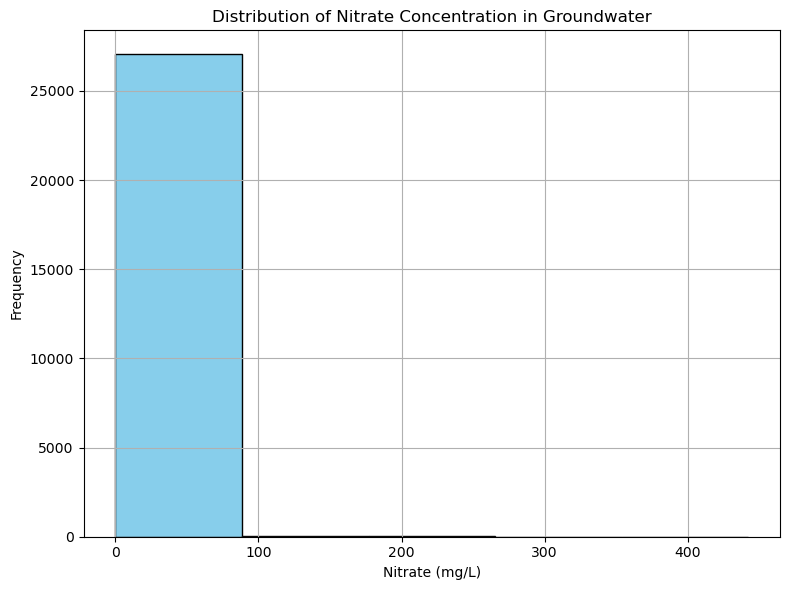

In [20]:

import pandas as pd
import matplotlib.pyplot as plt

# Replace with the actual path to your data file
file_path = 'Neat_Imputed_Nitrate_Dataset.csv'

# Load the data into a DataFrame
df = pd.read_csv(file_path)

# Plot the histogram of nitrate values
plt.figure(figsize=(8, 6))
plt.hist(df["nitrate_groundwater_mg_L"], color='skyblue', edgecolor='black', bins=5
)
plt.title('Distribution of Nitrate Concentration in Groundwater')
plt.xlabel("Nitrate (mg/L)")
plt.ylabel("Frequency")
plt.grid(True)
plt.tight_layout()
plt.show()


In [2]:
import pandas as pd

# Load the dataset
df = pd.read_csv("Neat_Imputed_Nitrate_Dataset.csv")

# Check for missing values
missing_values = df.isnull().sum()
missing_percent = (missing_values / len(df)) * 100
missing_report = pd.DataFrame({
    'Missing Count': missing_values,
    'Missing %': missing_percent
})

# Show only columns with missing data
missing_report[missing_report['Missing Count'] > 0].sort_values(by='Missing %', ascending=False)


,Missing Count,Missing %


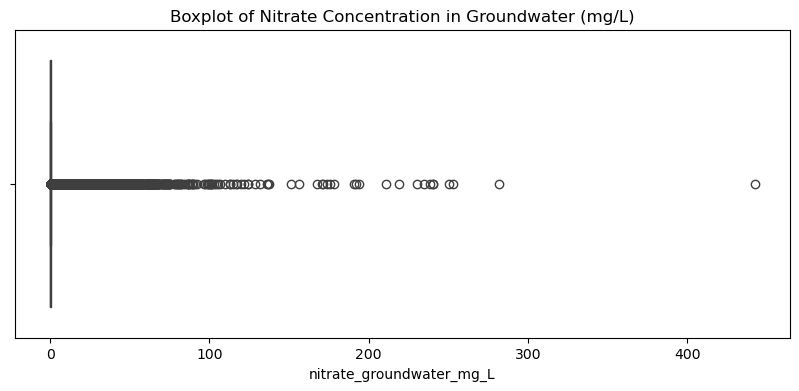

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualize the distribution of the target variable
plt.figure(figsize=(10, 4))
sns.boxplot(x=df['nitrate_groundwater_mg_L'])
plt.title("Boxplot of Nitrate Concentration in Groundwater (mg/L)")
plt.xlabel("nitrate_groundwater_mg_L")
plt.show()


In [4]:
# Compute correlation matrix
corr_matrix = df.corr(numeric_only=True)

# Filter highly correlated features (> 0.95 but not 1.0)
high_corr = corr_matrix[(corr_matrix > 0.95) & (corr_matrix < 1.0)]
high_corr = high_corr.dropna(how='all').dropna(axis=1, how='all')

high_corr


,evaporation_mm,avg_temp_C
evaporation_mm,NaN,0.984053
avg_temp_C,0.984053,NaN


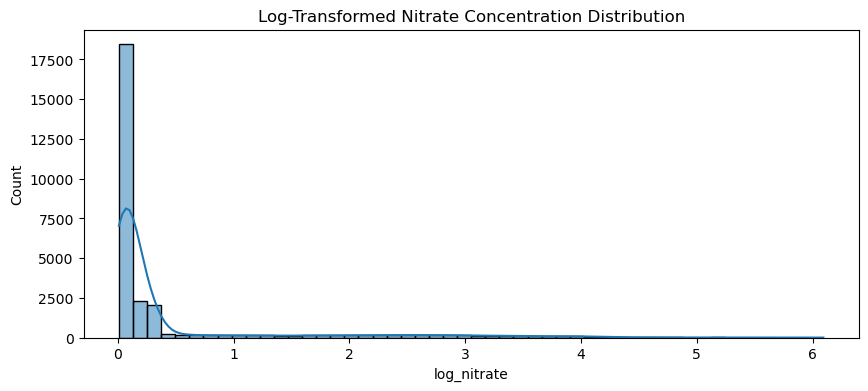

In [5]:
import numpy as np

# Log-transform the target variable to reduce skew
df['log_nitrate'] = np.log1p(df['nitrate_groundwater_mg_L'])  # Safe for zero values

# Plot the transformed distribution
plt.figure(figsize=(10, 4))
sns.histplot(df['log_nitrate'], kde=True, bins=50)
plt.title("Log-Transformed Nitrate Concentration Distribution")
plt.xlabel("log_nitrate")
plt.show()


In [6]:
# Encode categorical variables
df_encoded = pd.get_dummies(
    df,
    columns=['crop_type', 'soil_type', 'aquifer_type', 'urbanization'],
    drop_first=True  # Avoids dummy variable trap
)

# Preview encoded dataset
df_encoded.head()


,year,month,pH,electrical_conductivity_dS_m,ammonium_mg_L,nitrate_input_mg_L,fertilizer_kg_ha,manure_kg_ha,chloride_mg_L,livestock_density_LU_ha,...,crop_type_Grass,crop_type_Maize,crop_type_Potatoes,crop_type_Wheat,soil_type_Loess,soil_type_Peat,soil_type_Sand,aquifer_type_Unconfined,urbanization_Low,urbanization_Medium
0,1979.0,11.0,7.02,8.328,0.23,49.967142,173.857475,134.226232,16.0,2.183421,...,True,False,False,False,False,False,True,True,False,True
1,1980.0,10.0,7.40,5.198,0.14,43.617357,136.464441,209.288932,21.0,2.904139,...,False,False,True,False,False,False,False,False,True,False
2,1982.0,5.0,7.40,5.424,1.30,51.476885,182.969100,109.027497,28.0,1.801470,...,True,False,False,False,False,False,False,False,False,True
3,1984.0,5.0,7.38,5.537,0.15,60.230299,166.742981,192.279529,36.0,2.865434,...,True,False,False,False,False,False,True,True,True,False
4,1985.0,7.0,7.38,5.706,0.15,42.658466,119.997286,168.927059,40.5,2.344822,...,True,False,False,False,False,False,True,True,True,False


Shape: (27101, 23)
Missing values:
 year                            0
month                           0
pH                              0
electrical_conductivity_dS_m    0
ammonium_mg_L                   0
nitrate_input_mg_L              0
fertilizer_kg_ha                0
manure_kg_ha                    0
chloride_mg_L                   0
crop_type                       0
livestock_density_LU_ha         0
urbanization                    0
soil_type                       0
aquifer_type                    0
permeability_m_day              0
groundwater_level_cm            0
precipitation_mm                0
evaporation_mm                  0
drought_days                    0
avg_sunlight_hours              0
avg_humidity_percent            0
avg_temp_C                      0
nitrate_groundwater_mg_L        0
dtype: int64
Duplicate rows: 0


,year,month,pH,electrical_conductivity_dS_m,ammonium_mg_L,nitrate_input_mg_L,fertilizer_kg_ha,manure_kg_ha,chloride_mg_L,livestock_density_LU_ha,permeability_m_day,groundwater_level_cm,precipitation_mm,evaporation_mm,drought_days,avg_sunlight_hours,avg_humidity_percent,avg_temp_C,nitrate_groundwater_mg_L
count,27101.000000,27101.000000,27101.000000,27101.000000,27101.000000,27101.000000,27101.000000,27101.000000,27101.000000,27101.000000,27101.000000,27101.000000,27101.000000,27101.000000,27101.000000,27101.000000,27101.00000,27101.000000,27101.000000
mean,1997.978414,6.708756,6.724183,13.648492,2.937844,45.026263,149.925547,180.116825,366.462398,2.001860,0.799321,100.126846,65.647578,48.457068,9.278514,5.942161,78.31556,12.628298,2.497244
std,11.234916,2.655303,0.727037,40.243300,6.992857,9.977143,30.061052,40.023310,1636.288393,0.499459,0.297118,29.693182,11.193427,19.846930,4.471376,1.897863,5.33225,4.626617,10.808021
min,1979.000000,1.000000,2.820000,0.200000,0.010000,10.000000,50.000000,60.000000,0.106000,0.500000,0.100000,30.000000,45.000000,10.000000,5.000000,2.000000,72.00000,2.500000,0.010000
25%,1990.000000,5.000000,6.730000,5.750000,0.241000,38.286265,129.452362,153.029950,25.581000,1.668464,0.597226,79.614531,55.000000,35.000000,5.000000,4.000000,75.00000,9.000000,0.050000
50%,1996.000000,7.000000,6.900000,6.300000,0.562000,45.045293,150.012323,180.277898,39.360000,2.000381,0.800945,99.913392,70.000000,50.000000,8.000000,6.000000,78.00000,13.000000,0.100000
75%,2005.000000,9.000000,7.020000,7.800000,2.031000,51.751644,170.370358,207.245922,73.523000,2.338750,1.001760,120.271920,75.000000,65.000000,12.000000,7.000000,82.00000,16.000000,0.280000
max,2023.000000,12.000000,9.050000,503.000000,165.450000,89.790843,250.000000,300.000000,19809.920000,4.000000,1.934656,200.000000,80.000000,75.000000,20.000000,8.000000,90.00000,18.000000,442.233000


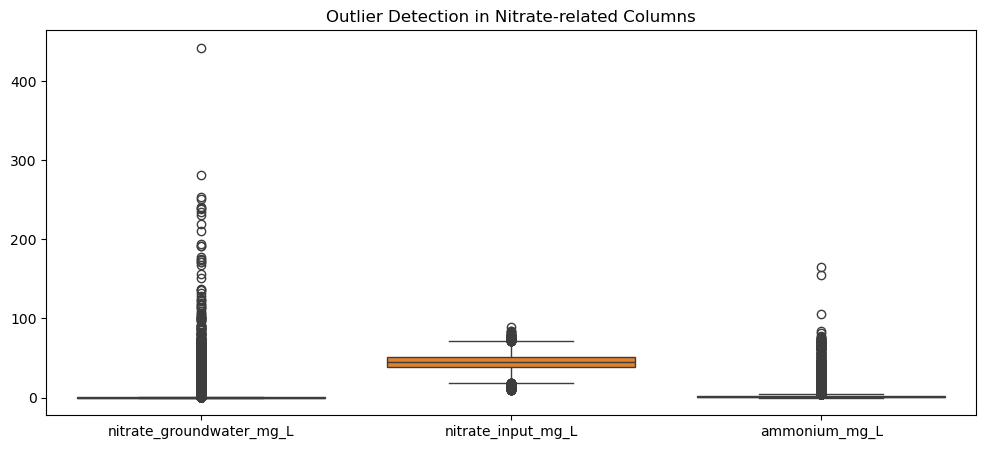

Cleaned DataFrame shape: (27101, 31)


,pH,electrical_conductivity_dS_m,ammonium_mg_L,nitrate_input_mg_L,fertilizer_kg_ha,manure_kg_ha,chloride_mg_L,livestock_density_LU_ha,permeability_m_day,groundwater_level_cm,...,crop_type_Maize,crop_type_Potatoes,crop_type_Wheat,soil_type_Loess,soil_type_Peat,soil_type_Sand,aquifer_type_Unconfined,urbanization_Low,urbanization_Medium,date
0,7.02,8.328,0.23,49.967142,173.857475,134.226232,16.0,2.183421,0.832854,104.511077,...,False,False,False,False,False,True,True,False,True,1979-11-01
1,7.40,5.198,0.14,43.617357,136.464441,209.288932,21.0,2.904139,1.024995,159.220367,...,False,True,False,False,False,False,False,True,False,1980-10-01
2,7.40,5.424,1.30,51.476885,182.969100,109.027497,28.0,1.801470,0.573460,124.713875,...,False,False,False,False,False,False,False,False,True,1982-05-01
3,7.38,5.537,0.15,60.230299,166.742981,192.279529,36.0,2.865434,0.229534,57.743021,...,False,False,False,False,False,True,True,True,False,1984-05-01
4,7.38,5.706,0.15,42.658466,119.997286,168.927059,40.5,2.344822,0.527653,81.627843,...,False,False,False,False,False,True,True,True,False,1985-07-01


In [22]:
# 📦 Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 📁 Load your dataset (update with actual file path)
file_path = 'Neat_Imputed_Nitrate_Dataset.csv'
df = pd.read_csv(file_path)

# 🔍 Inspect the data
print("Shape:", df.shape)
print("Missing values:\n", df.isnull().sum())

# ✅ Check for duplicates
print("Duplicate rows:", df.duplicated().sum())

# ✅ Confirm no missing values
assert df.isnull().sum().sum() == 0, "Dataset contains missing values"

# 📊 Basic summary statistics
display(df.describe())

# 🔎 Check for outliers in nitrate-related columns
plt.figure(figsize=(12, 5))
sns.boxplot(data=df[["nitrate_groundwater_mg_L", "nitrate_input_mg_L", "ammonium_mg_L"]])
plt.title("Outlier Detection in Nitrate-related Columns")
plt.show()

# 📉 Log transformation to reduce skewness in nitrate-related columns
for col in ["nitrate_groundwater_mg_L", "nitrate_input_mg_L", "ammonium_mg_L"]:
    df[f"log_{col}"] = np.log1p(df[col])  # log1p = log(1 + x) for stability

# 🔠 One-hot encode categorical variables
categorical_cols = ["crop_type", "soil_type", "aquifer_type", "urbanization"]
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# 📅 Combine year and month into a single datetime column
df["date"] = pd.to_datetime(df["year"].astype(int).astype(str) + "-" + df["month"].astype(int).astype(str) + "-01")

# 🧹 Drop original year and month if not needed
df.drop(["year", "month"], axis=1, inplace=True)

# ✅ Final data check
print("Cleaned DataFrame shape:", df.shape)
df.head()
